In [76]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

In [77]:
# Shuffle-based p-value for a correlation
# 
#  Here we demonstrate how to use "shuffle" or permutation
#  based procedures to test whether a correlation is statistically
#  signficant
#
#  In HW6 question 2, you will use a procedure like this to test
#  the significance of the estimated filter kernel (h_est) at each
#  timepoint.


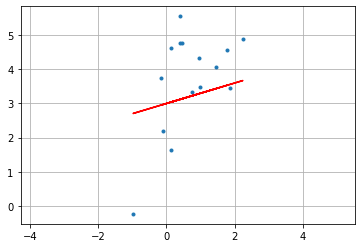

In [89]:
# Simulate some correlated data
N = 15
np.random.seed(0)
x = np.random.randn(N)
y = 0.7*x + 3 + np.random.randn(N) # y is linearly related to x, plus noise

plt.plot(x,y,'.')
plt.plot(x,0.3*x + 3,'r-')
plt.grid()
plt.axis('equal');

In [90]:
r,p = pearsonr(x,y)
print('The correlation is r=%3.3g (p=%3.3g)' % (r,p))

The correlation is r=0.548 (p=0.0343)


In [91]:
# Use numpy permutation to reorder the elements of a vector:
np.random.permutation([ 8,9,10 ])

array([10,  9,  8])

In [92]:
# Randomly permute the elements of y 500 times. For each
# permutation, recompute the correlation with x and save
# the r value (correlation).
nshuff=500
r_shuff = []
for j in range(nshuff):
    r1,p1 = scipy.stats.pearsonr(x,np.random.permutation(y))
    r_shuff.append(r1)

Text(0, 0.5, 'Proportion of shuffles')

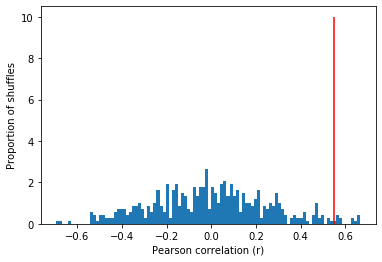

In [93]:
# Make a histogram comparing the shuffled distribution
# of correlation values (blue) and the value of the
# actual data (red)
plt.hist(r_shuff, 100, density=True)
plt.vlines(r, 0, 10, 'r')
plt.xlabel('Pearson correlation (r)')
plt.ylabel('Proportion of shuffles')

In [94]:
# Calculate the p-value using the shuffled data
p_shuff = (np.sum( r_shuff > r )+1)/nshuff
print('The shuffle-based p-value is p=%3.3g' % p_shuff)

The shuffle-based p-value is p=0.026
